# Procedural program to get and analyze RSS-Newsfeeds

## Libraries and settings

In [2]:
# Libraries
import os
import requests
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from requests_html import HTMLSession

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

u:\Lektionen\Scientific_Programming_FS2023\scientific_programming\Week_07\challenge


## Functions to get the content of RSS-Feeds

In [18]:
def get_source(url):
    """
    Provides source code of the website of the specified URL.

    :param url: URL of the page to scrape. Type = str
    :return: Response from serrver request. Type = requests_html.HTMLResponse
    """
    try:
        session = HTMLSession()
        response = session.get(url)
        return response
    except requests.exceptions.RequestException as e:
        print(e)

def get_single_feed(url):
    """
    Derives the content of a single RSS-Feed for the provided URL.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    response = get_source(url)
    df = pd.DataFrame(columns = ['title', 'pubDate', 'guid', 'description'])

    with response as r:
        items = r.html.find("item", first=False)
        for item in items:        
            title = item.find('title', first=True).text
            pubDate = item.find('pubDate', first=True).text
            guid = item.find('guid', first=True).text
            description = item.find('description', first=True).text
            row = {'title': title, 'pubDate': pubDate, 'guid': guid, 'description': description}
            df = pd.concat([df, pd.DataFrame.from_records([row])], ignore_index=True)

    return df

def get_multiple_feeds(url_list):
    """
    Derives the content on RSS-Feed for the provided list of URLs.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    
    df = pd.DataFrame(columns = ['title', 'pubDate', 'guid', 'description'])

    for url in url_list:

        df_iter = get_single_feed(url)
        df = pd.concat([df, df_iter], ignore_index=True)

    return df


## Getting infos from single RSS-Feed

In [19]:
# Call functions for single feed
df_feed = get_single_feed('https://www.nzz.ch/international.rss')
df_feed.head(10)

,title,pubDate,guid,description
0,Warum Technologien in der Klimadebatte wichtig...,"Sun, 26 Mar 2023 03:30:00 GMT",ld.1732025,Emissionen und Temperaturen steigen weiter an....
1,Rwanda setzt den Genozid-Helden Paul Rusesabag...,"Sat, 25 Mar 2023 11:20:33 GMT",ld.1732124,Während zweieinhalb Jahren war der frühere Hot...
2,DIE NEUSTEN ENTWICKLUNGEN - Donald Trump: Ex-P...,"Sun, 26 Mar 2023 03:01:05 GMT",ld.1627342,Trotz seiner Wahlniederlage 2020 und der Ansti...
3,Verwandelt sich die EU gerade in eine Militärm...,"Sat, 25 Mar 2023 04:30:00 GMT",ld.1732078,"Der Ukraine gehen die Artilleriegranaten aus, ..."
4,Kanada und die USA regeln die illegale Migrati...,"Sat, 25 Mar 2023 04:30:00 GMT",ld.1732055,Die inoffizielle Einwanderung über die grüne G...
5,Indiens Wahlkampf ist lanciert: Der Opposition...,"Sat, 25 Mar 2023 04:30:00 GMT",ld.1732069,Ein Richter hat den Kongresspolitiker Rahul Ga...
6,Uno-Wasserkonferenz endet mit umfassendem Akti...,"Sat, 25 Mar 2023 06:25:16 GMT",ld.1732116,Die rund 10 000 Teilnehmer der Konferenz besch...
7,Nach Bachmut liegt auch Awdijiwka in Trümmern:...,"Fri, 24 Mar 2023 15:57:00 GMT",ld.1731999,Moskaus Angriffe im Donbass fordern viele Opfe...
8,Der britische König kommt nicht nach Frankreic...,"Fri, 24 Mar 2023 15:13:01 GMT",ld.1732033,Der französische Präsident hat wegen der Prote...
9,DIE NEUSTEN ENTWICKLUNGEN - Rentenreform in Fr...,"Fri, 24 Mar 2023 11:05:08 GMT",ld.1731992,Frankreichs Regierung hat die Rentenreform ohn...


## Getting infos from multiple RSS-Feeds

In [20]:
# List with RSS-Feeds (germ. and engl.)

url_list = ['https://www.spiegel.de/schlagzeilen/index.rss',
            'https://www.nzz.ch/international.rss',
            'https://rss.nytimes.com/services/xml/rss/nyt/Europe.xml',
            'https://rss.nytimes.com/services/xml/rss/nyt/World.xml']

# Function call
df_multi_feeds = get_multiple_feeds(url_list)
df_multi_feeds.head(10)

,title,pubDate,guid,description
0,Deutschland gewinnt gegen Peru: Die Mühen des ...,"Sun, 26 Mar 2023 10:20:35 +0200",https://www.spiegel.de/sport/fussball/deutschl...,Das DFB-Team hat das erste Spiel nach der WM g...
1,Ukraine-Russland-News heute: Moskau nimmt Bela...,"Sun, 26 Mar 2023 10:15:47 +0200",https://www.spiegel.de/ausland/ukraine-russlan...,"Die Ankündigung Moskaus, taktische Atomwaffen ..."
2,Bluttat von Hamburg: Zeugen Jehovas nehmen Abs...,"Sun, 26 Mar 2023 10:13:36 +0200",https://www.spiegel.de/panorama/bluttat-von-ha...,Tausende Gläubige versammelten sich am Samstag...
3,Mississippi: Nach Tornado mit 26 Toten Notstan...,"Sun, 26 Mar 2023 09:26:29 +0200",https://www.spiegel.de/panorama/mississippi-na...,Mindestens zwei Dutzend Menschen sind bei eine...
4,Brustkrebs-OP: »Eine gut durchgeführte Mastekt...,"Sun, 26 Mar 2023 09:15:53 +0200",https://www.spiegel.de/gesundheit/brustkrebs-o...,Eine 40-Jährige entscheidet sich nach einer Br...
5,Autos: Benziner wird bei Autofahrern wieder be...,"Sun, 26 Mar 2023 09:06:00 +0200",https://www.spiegel.de/auto/autos-benziner-wir...,Hybrid? Elektro? Die Mehrheit der Autofahrer w...
6,31 statt 49 Euro: Deutschlandticket für Gering...,"Sun, 26 Mar 2023 08:57:19 +0200",https://www.spiegel.de/auto/31-statt-49-euro-d...,Hessen will als erstes Bundesland eine günstig...
7,Honduras bricht Beziehungen zu Taiwan ab,"Sun, 26 Mar 2023 08:52:47 +0200",https://www.spiegel.de/ausland/honduras-bricht...,Taiwan hat einen weiteren Verbündeten verloren...
8,Ricarda Lang: Grünen-Vorsitzende ist verlobt,"Sun, 26 Mar 2023 08:11:35 +0200",https://www.spiegel.de/panorama/leute/ricarda-...,Fast 20.000 Likes und sehr viele Glückwünsche:...
9,Bundeswehr: Marie-Agnes Strack-Zimmermann will...,"Sun, 26 Mar 2023 07:56:12 +0200",https://www.spiegel.de/politik/bundeswehr-mari...,Das Beschaffungswesen der Bundeswehr ist laut ...


## Finding the k most frequent words per RSS-Feed title

In [21]:
for item in df_multi_feeds['title']:

    from collections import Counter
    
    split_txt = item.split()
    Counter = Counter(split_txt)
    most_occur = Counter.most_common(5)
    print(most_occur)

[('Deutschland', 1), ('gewinnt', 1), ('gegen', 1), ('Peru:', 1), ('Die', 1)]
[('Ukraine-Russland-News', 1), ('heute:', 1), ('Moskau', 1), ('nimmt', 1), ('Belarus', 1)]
[('von', 2), ('Bluttat', 1), ('Hamburg:', 1), ('Zeugen', 1), ('Jehovas', 1)]
[('Mississippi:', 1), ('Nach', 1), ('Tornado', 1), ('mit', 1), ('26', 1)]
[('Brustkrebs-OP:', 1), ('»Eine', 1), ('gut', 1), ('durchgeführte', 1), ('Mastektomie', 1)]
[('Autos:', 1), ('Benziner', 1), ('wird', 1), ('bei', 1), ('Autofahrern', 1)]
[('31', 1), ('statt', 1), ('49', 1), ('Euro:', 1), ('Deutschlandticket', 1)]
[('Honduras', 1), ('bricht', 1), ('Beziehungen', 1), ('zu', 1), ('Taiwan', 1)]
[('Ricarda', 1), ('Lang:', 1), ('Grünen-Vorsitzende', 1), ('ist', 1), ('verlobt', 1)]
[('Bundeswehr:', 1), ('Marie-Agnes', 1), ('Strack-Zimmermann', 1), ('will', 1), ('»LNG-Geschwindigkeit«', 1)]
[('Macron', 1), ('vs.', 1), ('Frankreich:', 1), ('Streiks,', 1), ('Proteste', 1)]
[('»Earth', 1), ('Hour«:', 1), ('Russland', 1), ('boykottiert', 1), ('die', 1

## Create a wordcloud with the most frequent words in RSS-Feed titles

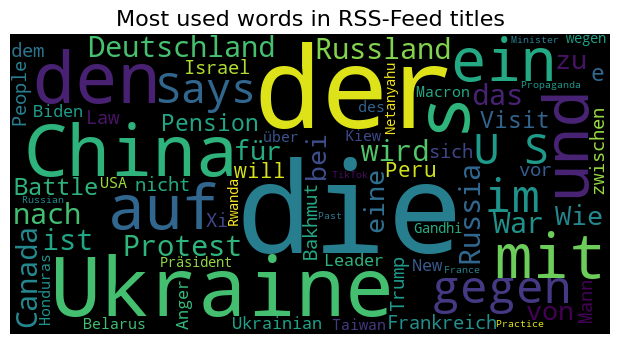

In [22]:
# Wordcloud function
def wordCloud_generator(data, title=None):
    """
    Creates a plot of a word cloud based on the given data

    :param data: input data. Type = str
    :param title: plot title. Type

    """
    wordcloud = WordCloud(height=300,
                          width=600,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    
    # Plot the WordCloud image                        
    plt.figure(figsize = (6, 4), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=16)
    plt.show()
    
# Create Wordcloud
wordCloud_generator(df_multi_feeds['title'], 
                    title="Most used words in RSS-Feed titles")

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [23]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-03-26 10:51:21
Python Version: 3.10.9
-----------------------------------
